## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
# Review the basic information about the data
data_info = diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [6]:
# Descriptive statistics of the data
data_description = diabetes_data.describe()

data_description

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [8]:
# Specify the columns where you want to replace zeros with nan
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with nan in the specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

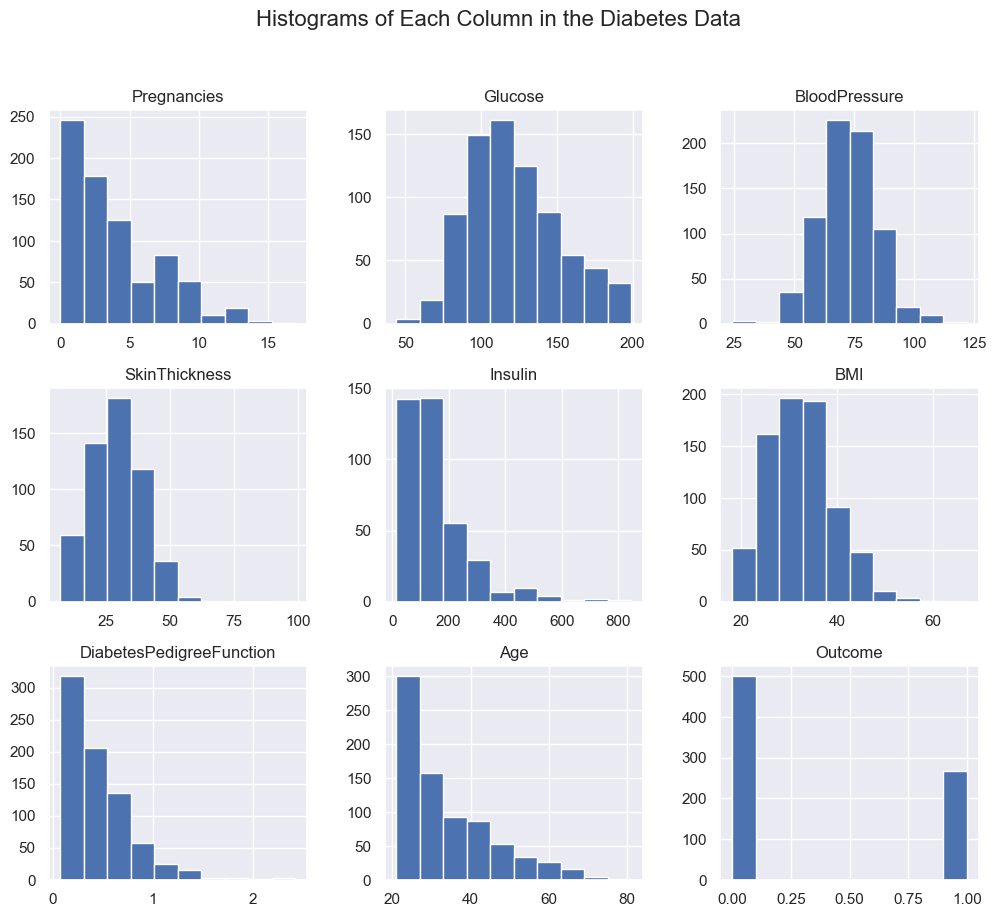

In [9]:
# Plotting histograms of each column in the diabetes_data DataFrame
diabetes_data.hist(figsize=(12, 10), bins=10)
plt.suptitle("Histograms of Each Column in the Diabetes Data", fontsize=16)
plt.show()

#### Replace the zeros with mean and median values.

In [10]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

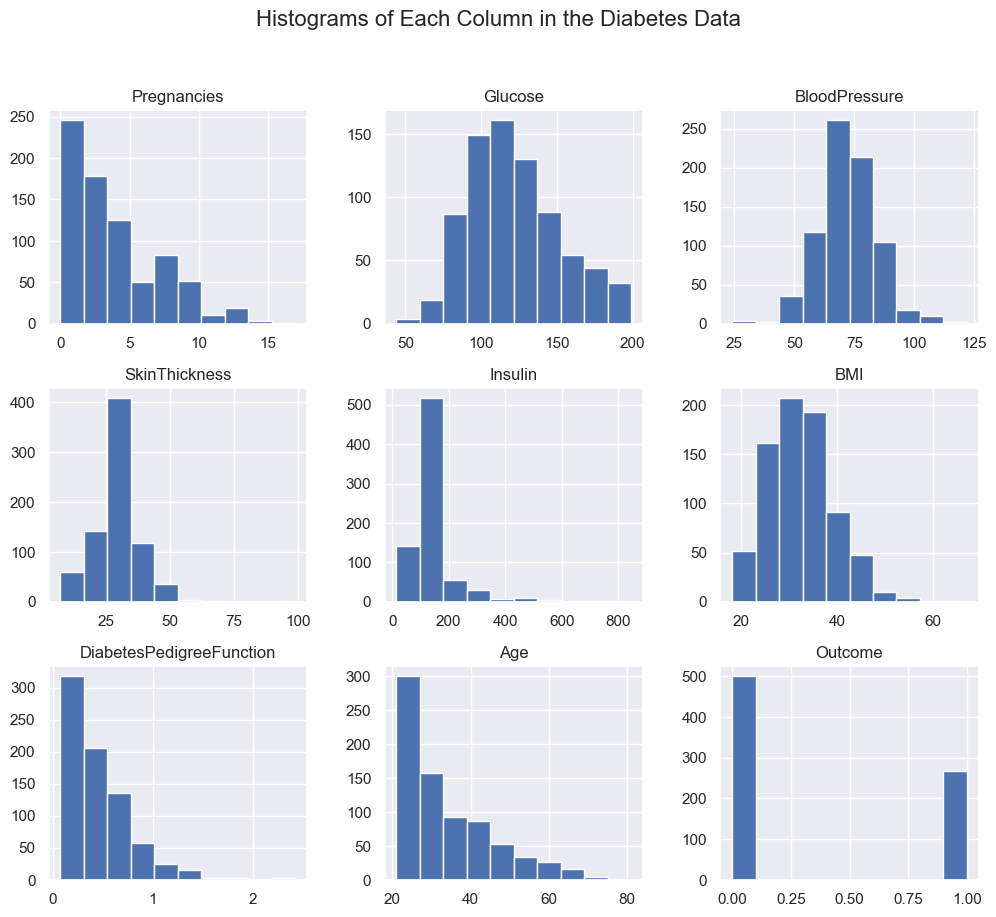

In [11]:
# Plotting histograms of each column in the diabetes_data DataFrame
diabetes_data.hist(figsize=(12, 10), bins=10)
plt.suptitle("Histograms of Each Column in the Diabetes Data", fontsize=16)
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


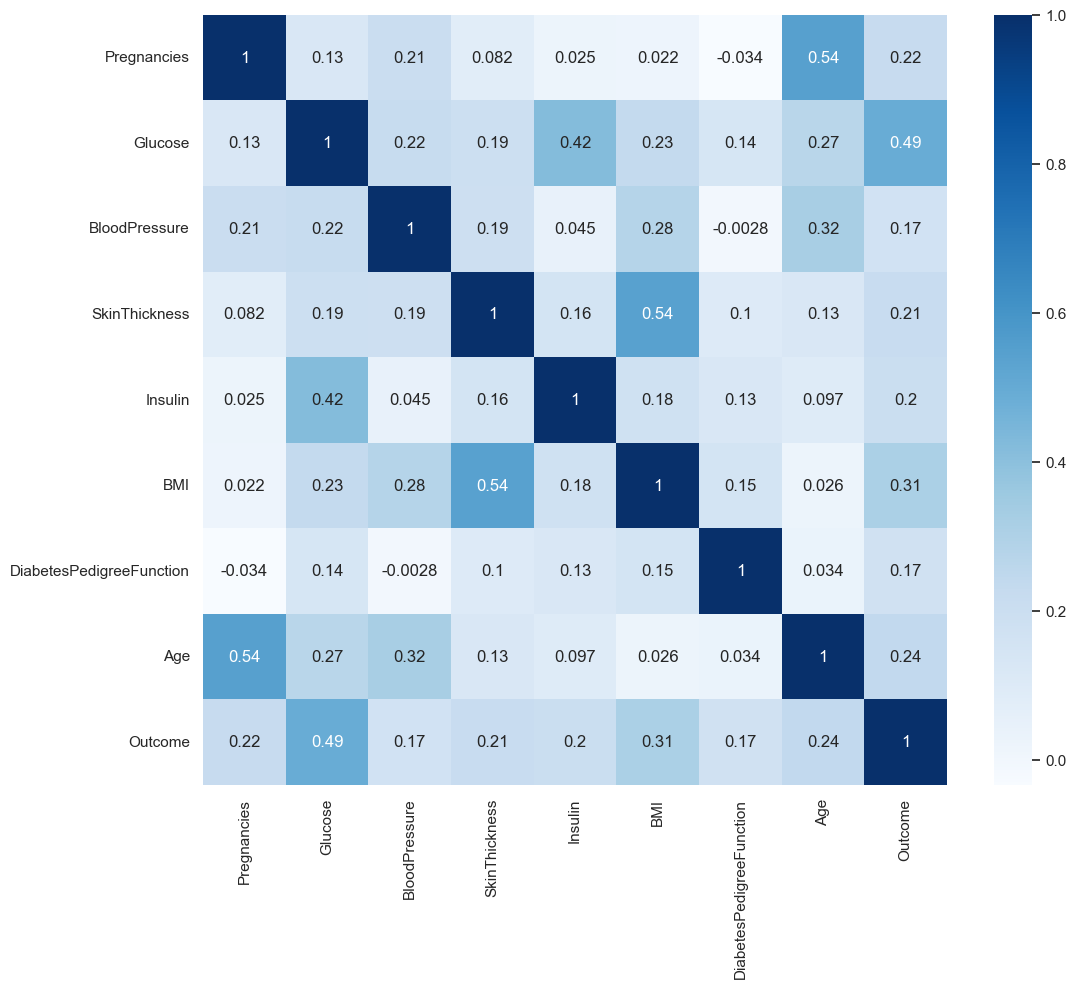

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
# Defining the y variable as the Outcome column
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [15]:
from sklearn.model_selection import train_test_split

# Define the feature variables X (excluding the 'Outcome' column)
X = diabetes_data.drop(columns=['Outcome'])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the sizes of the train and test datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((537, 8), (231, 8), (537,), (231,))

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first 5 rows of the scaled training data
X_train_scaled[:5]

array([[-0.8362943 , -0.89610788, -1.00440048, -1.26954457, -0.956993  ,
        -1.20382556, -0.61421636, -0.94861028],
       [ 0.39072767, -0.56399695, -0.02026586,  0.02969309,  2.13679743,
         0.66449801, -0.90973787, -0.43466673],
       [-1.14304979,  0.43233584, -0.34831073,  1.56515578,  1.26775517,
         1.44057087, -0.30699103, -0.77729576],
       [ 0.08397217,  0.29949146, -0.34831073, -0.91520703,  0.29442785,
         0.11837266, -0.90681191, -0.43466673],
       [-0.8362943 , -0.63041914, -3.46473705,  1.09270572, -0.66731225,
         1.58428807, -0.83951493, -0.00638043]])

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [18]:
from sklearn.neighbors import KNeighborsClassifier



test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# List of values for k (number of neighbors)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Iterate through different values of k
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict the outcomes on the training data
    y_train_pred = knn.predict(X_train_scaled)
    
    # Predict the outcomes on the test data
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Print the train and test scores for this iteration
    print(f"k = {k}: Train accuracy = {train_accuracy:.2f}, Test accuracy = {test_accuracy:.2f}")

k = 1: Train accuracy = 1.00, Test accuracy = 0.67
k = 2: Train accuracy = 0.85, Test accuracy = 0.67
k = 3: Train accuracy = 0.85, Test accuracy = 0.67
k = 4: Train accuracy = 0.84, Test accuracy = 0.69
k = 5: Train accuracy = 0.84, Test accuracy = 0.70
k = 6: Train accuracy = 0.82, Test accuracy = 0.68
k = 7: Train accuracy = 0.83, Test accuracy = 0.73
k = 8: Train accuracy = 0.82, Test accuracy = 0.74
k = 9: Train accuracy = 0.83, Test accuracy = 0.73
k = 10: Train accuracy = 0.82, Test accuracy = 0.72


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [24]:
# List of values for k (number of neighbors)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize variables to keep track of the max score and corresponding k
max_train_score = 0
best_k = 0

# Iterate through different values of k
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict the outcomes on the training data
    y_train_pred = knn.predict(X_train_scaled)
    
    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Update max_train_score and best_k if this accuracy is higher than previous max
    if train_accuracy > max_train_score:
        max_train_score = train_accuracy
        best_k = k

# Print the number of neighbors that resulted in the max score in the training dataset
print(f"The best number of neighbors is {best_k} with a training accuracy of {max_train_score:.2f}")


The best number of neighbors is 1 with a training accuracy of 1.00


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [23]:
# List of values for k (number of neighbors)
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Initialize variables to keep track of the max score and corresponding k
max_test_score = 0
best_k_test = 0

# Iterate through different values of k
for k in k_values:
    # Initialize the KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Predict the outcomes on the test data
    y_test_pred = knn.predict(X_test_scaled)
    
    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Update max_test_score and best_k_test if this accuracy is higher than previous max
    if test_accuracy > max_test_score:
        max_test_score = test_accuracy
        best_k_test = k

# Print the number of neighbors that resulted in the max score in the testing dataset
print(f"The best number of neighbors for the testing dataset is {best_k_test} with an accuracy of {max_test_score:.2f}")


The best number of neighbors for the testing dataset is 8 with an accuracy of 0.74


Plot the train and test model performance by number of neighbors.

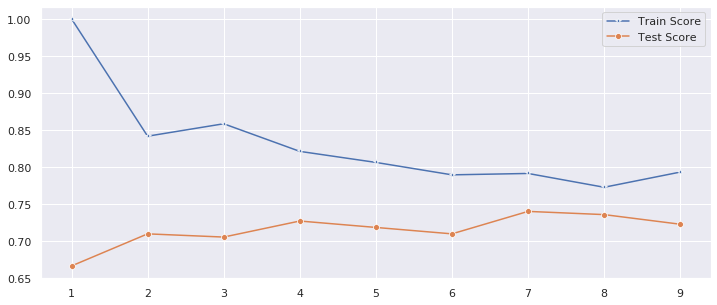

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [28]:
# Identify the best number of neighbors based on the test scores
best_k = test_scores.index(max(test_scores)) + 1

# Fit the model with the best number of neighbors
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Score the model on the test data
best_score = knn_best.score(X_test_scaled, y_test)

# Print the best number of neighbors and the corresponding score
print(f"The best number of neighbors is {best_k} with a test score of {best_score:.2f}")


The best number of neighbors is 8 with a test score of 0.74


In [29]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

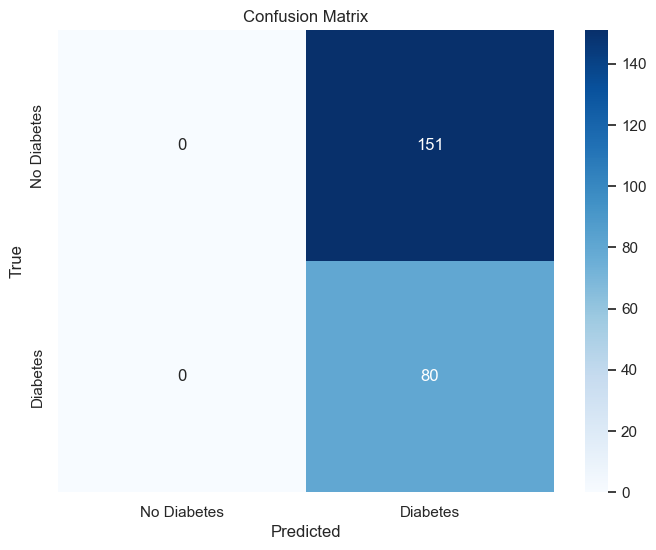

In [30]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [31]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

 No Diabetes       0.00      0.00      0.00       151
    Diabetes       0.35      1.00      0.51        80

    accuracy                           0.35       231
   macro avg       0.17      0.50      0.26       231
weighted avg       0.12      0.35      0.18       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [33]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': np.arange(10, 100, 10)}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
rf_cv = GridSearchCV(rf, param_grid, cv=5)

# Fit the model to the data
rf_cv.fit(X, y)

# Print the best score and the best parameter for n_estimators
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.7708853238265003
Best Parameters: {'n_estimators': 30}
